In [1]:
from IPython.display import display, HTML

# 👇 Replace this URL with your actual image URL
image_url = "https://i.postimg.cc/PJstyB1r/Whats-App-Image-2025-07-29-at-6-36-19-PM.jpg"

interface_html = f"""
<style>
    body {{
        font-family: 'Segoe UI', sans-serif;
    }}
    .header {{
        background-color: #031D44;
        padding: 20px;
        border-radius: 10px;
        color: white;
        display: flex;
        justify-content: space-between;
        align-items: center;
    }}
    .profile-img {{
        border-radius: 50%;
        height: 100px;
        width: 100px;
        object-fit: cover;
        border: 2px solid #fff;
    }}
    .section {{
        background-color: #062F4F;
        color: white;
        padding: 15px;
        border-radius: 8px;
        margin-top: 20px;
    }}
    .objective {{
        background-color: #1B3B6F;
        color: white;
        padding: 15px;
        border-radius: 8px;
        margin-top: 20px;
    }}
    .table-of-contents {{
        background-color: #eaf6ff;
        padding: 15px;
        border-radius: 10px;
        border-left: 5px solid #3399ff;
        margin-top: 20px;
        color: #000;
    }}
</style>

<!-- Header Section -->
<div class="header">
    <div>
        <h2>Mahima gupta<br><span style="font-size:16px; color: #bbb;">DEVELOPER</span></h2>

        📧 guptamahima108@gmail.com</p>
    </div>
     <img src="{image_url}" class="profile-img" alt="Profile Photo">
</div>

<!-- Introduction Section -->
<div class="section">
    <h3>Introduction to Twitter Sentiment Analyzer</h3>
    <p>From Fundamentals to Real-World AI/NLP — Your LLM Journey Starts Here.</p>
</div>

<!-- Objective Section -->
<div class="objective">
    <h3>🎯 Objective:</h3>
    <p>
        Analyze sentiment in a dataset of tweets to classify their sentiment as positive, neutral, or negative.
        You’ll preprocess the tweets, extract features, and train a machine learning model to predict sentiment.
        Finally, you’ll evaluate the model and test it on new tweets.
    </p>
</div>

<!-- Table of Contents Section -->
<div class="table-of-contents">
    <h4>📚 Sentiment Analysis — <span style="color:#3399ff;">Table of Contents</span></h4>
    <ul>
        <li>📂 <b>Load Dataset</b><br><small>Load labeled tweets from CSV using <code>pandas</code>.</small></li>
        <li>✂️ <b>Tokenize Text</b><br><small>Break tweets into tokens (words) for processing.</small></li>
        <li>🧹 <b>Remove Noise</b><br><small>Stopword removal, stemming, and cleaning.</small></li>
        <li>🧠 <b>Feature Extraction</b><br><small>TF-IDF, word embeddings (Spacy/GloVe).</small></li>
        <li>🤖 <b>Model Training</b><br><small>Train ML models like Logistic Regression.</small></li>
        <li>📈 <b>Evaluation</b><br><small>Confusion matrix, accuracy, ROC curve.</small></li>
        <li>🧪 <b>Test on New Tweets</b><br><small>Predict sentiment on live or new data.</small></li>
    </ul>
</div>
"""

# Display the interface
display(HTML(interface_html))


## step 1 import all the necessary libraries and download all the import tools into the workspace

In [ ]:
import pandas as pd
import nltk
import re
from nltk import PorterStemmer
nltk.download('punkt_tab')

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>📂 Load Dataset</h2>
</div>
"""

display(HTML(interface_html))


In [ ]:
data=pd.read_csv("Tweets.csv")

In [ ]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>✂️ Tokenize Text</h2>
</div>
"""

display(HTML(interface_html))


In [ ]:
from nltk.tokenize import word_tokenize
cols_data = [
    'tweet_id','airline_sentiment','airline_sentiment_confidence','negativereason',
    'negativereason_confidence','airline','airline_sentiment_gold','name',
    'negativereason_gold','retweet_count','text','tweet_coord','tweet_created',
    'tweet_location','user_timezone'
]

for cols in cols_data:
    data[cols + '_tokens'] = data[cols].apply(lambda x: word_tokenize(str(x)))
print(data[['user_timezone', 'user_timezone_tokens']].head())
token_columns = [cols + '_tokens' for cols in cols_data]
df = data[token_columns]


                user_timezone                  user_timezone_tokens
0  Eastern Time (US & Canada)  [Eastern, Time, (, US, &, Canada, )]
1  Pacific Time (US & Canada)  [Pacific, Time, (, US, &, Canada, )]
2  Central Time (US & Canada)  [Central, Time, (, US, &, Canada, )]
3  Pacific Time (US & Canada)  [Pacific, Time, (, US, &, Canada, )]
4  Pacific Time (US & Canada)  [Pacific, Time, (, US, &, Canada, )]


## Explanation of above code : actually we need to apply tokenization on whole dataset so we will follow these steps that are mentioned below:
1.create a seprate list and store each column in it.


2.run the for loop on the list [cols +_tokens]-> this is called concatenation it will add the tokenize data to their respective columns.


3.data[cols].apply(lambda x: word_tokenize(str(x)))->this lambda function is used in pandas to conver all the numeric or alphabetical data into the string and then word_tokenization is applied over it.

4.token_columns = [cols + '_tokens' for cols in cols_data]
df = data[token_columns] --> this step will create a seprate dataset of the tokenized columns.

## now the step written below df.head(20) this will show the first 20 rows of dataset named as df.

In [ ]:
df.head(20)

,tweet_id_tokens,airline_sentiment_tokens,airline_sentiment_confidence_tokens,negativereason_tokens,negativereason_confidence_tokens,airline_tokens,airline_sentiment_gold_tokens,name_tokens,negativereason_gold_tokens,retweet_count_tokens,text_tokens,tweet_coord_tokens,tweet_created_tokens,tweet_location_tokens,user_timezone_tokens
0,[570306133677760513],[neutral],[1.0],[nan],[nan],"[Virgin, America]",[nan],[cairdin],[nan],[0],"[@, VirginAmerica, What, @, dhepburn, said, .]",[nan],"[2015-02-24, 11:35:52, -0800]",[nan],"[Eastern, Time, (, US, &, Canada, )]"
1,[570301130888122368],[positive],[0.3486],[nan],[0.0],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[@, VirginAmerica, plus, you, 've, added, comm...",[nan],"[2015-02-24, 11:15:59, -0800]",[nan],"[Pacific, Time, (, US, &, Canada, )]"
2,[570301083672813571],[neutral],[0.6837],[nan],[nan],"[Virgin, America]",[nan],[yvonnalynn],[nan],[0],"[@, VirginAmerica, I, did, n't, today, ..., Mu...",[nan],"[2015-02-24, 11:15:48, -0800]","[Lets, Play]","[Central, Time, (, US, &, Canada, )]"
3,[570301031407624196],[negative],[1.0],"[Bad, Flight]",[0.7033],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[@, VirginAmerica, it, 's, really, aggressive,...",[nan],"[2015-02-24, 11:15:36, -0800]",[nan],"[Pacific, Time, (, US, &, Canada, )]"
4,[570300817074462722],[negative],[1.0],"[Ca, n't, Tell]",[1.0],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[@, VirginAmerica, and, it, 's, a, really, big...",[nan],"[2015-02-24, 11:14:45, -0800]",[nan],"[Pacific, Time, (, US, &, Canada, )]"
5,[570300767074181121],[negative],[1.0],"[Ca, n't, Tell]",[0.6842],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[@, VirginAmerica, seriously, would, pay, $, 3...",[nan],"[2015-02-24, 11:14:33, -0800]",[nan],"[Pacific, Time, (, US, &, Canada, )]"
6,[570300616901320704],[positive],[0.6745],[nan],[0.0],"[Virgin, America]",[nan],[cjmcginnis],[nan],[0],"[@, VirginAmerica, yes, ,, nearly, every, time...",[nan],"[2015-02-24, 11:13:57, -0800]","[San, Francisco, CA]","[Pacific, Time, (, US, &, Canada, )]"
7,[570300248553349120],[neutral],[0.634],[nan],[nan],"[Virgin, America]",[nan],[pilot],[nan],[0],"[@, VirginAmerica, Really, missed, a, prime, o...",[nan],"[2015-02-24, 11:12:29, -0800]","[Los, Angeles]","[Pacific, Time, (, US, &, Canada, )]"
8,[570299953286942721],[positive],[0.6559],[nan],[nan],"[Virgin, America]",[nan],[dhepburn],[nan],[0],"[@, virginamerica, Well, ,, I, didn't…but, NOW...",[nan],"[2015-02-24, 11:11:19, -0800]","[San, Diego]","[Pacific, Time, (, US, &, Canada, )]"
9,[570295459631263746],[positive],[1.0],[nan],[nan],"[Virgin, America]",[nan],[YupitsTate],[nan],[0],"[@, VirginAmerica, it, was, amazing, ,, and, a...",[nan],"[2015-02-24, 10:53:27, -0800]","[Los, Angeles]","[Eastern, Time, (, US, &, Canada, )]"


In [7]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>🧹 Remove Noise</h2>
</div>
"""

display(HTML(interface_html))


In [ ]:
token_columns = [col + '_tokens' for col in cols_data]
for col in token_columns:
    clean_col = col.replace('_tokens', '_clean_tokens')
    data[clean_col] = data[col].apply(
        lambda tokens: [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens if re.sub(r'[^a-zA-Z0-9]', '', word)]
    )
print(data[[col for col in data.columns if 'clean_tokens' in col]].head())
clean_token_columns = [col + '_clean_tokens' for col in cols_data]
df1 = data[clean_token_columns]
print(df1.head())

  tweet_id_clean_tokens airline_sentiment_clean_tokens  \
0  [570306133677760513]                      [neutral]   
1  [570301130888122368]                     [positive]   
2  [570301083672813571]                      [neutral]   
3  [570301031407624196]                     [negative]   
4  [570300817074462722]                     [negative]   

  airline_sentiment_confidence_clean_tokens negativereason_clean_tokens  \
0                                      [10]                       [nan]   
1                                   [03486]                       [nan]   
2                                   [06837]                       [nan]   
3                                      [10]               [Bad, Flight]   
4                                      [10]              [Ca, nt, Tell]   

  negativereason_confidence_clean_tokens airline_clean_tokens  \
0                                  [nan]    [Virgin, America]   
1                                   [00]    [Virgin, America]   
2    

In [ ]:
df1.head()

,tweet_id_clean_tokens,airline_sentiment_clean_tokens,airline_sentiment_confidence_clean_tokens,negativereason_clean_tokens,negativereason_confidence_clean_tokens,airline_clean_tokens,airline_sentiment_gold_clean_tokens,name_clean_tokens,negativereason_gold_clean_tokens,retweet_count_clean_tokens,text_clean_tokens,tweet_coord_clean_tokens,tweet_created_clean_tokens,tweet_location_clean_tokens,user_timezone_clean_tokens
0,[570306133677760513],[neutral],[10],[nan],[nan],"[Virgin, America]",[nan],[cairdin],[nan],[0],"[VirginAmerica, What, dhepburn, said]",[nan],"[20150224, 113552, 0800]",[nan],"[Eastern, Time, US, Canada]"
1,[570301130888122368],[positive],[03486],[nan],[00],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[VirginAmerica, plus, you, ve, added, commerci...",[nan],"[20150224, 111559, 0800]",[nan],"[Pacific, Time, US, Canada]"
2,[570301083672813571],[neutral],[06837],[nan],[nan],"[Virgin, America]",[nan],[yvonnalynn],[nan],[0],"[VirginAmerica, I, did, nt, today, Must, mean,...",[nan],"[20150224, 111548, 0800]","[Lets, Play]","[Central, Time, US, Canada]"
3,[570301031407624196],[negative],[10],"[Bad, Flight]",[07033],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[VirginAmerica, it, s, really, aggressive, to,...",[nan],"[20150224, 111536, 0800]",[nan],"[Pacific, Time, US, Canada]"
4,[570300817074462722],[negative],[10],"[Ca, nt, Tell]",[10],"[Virgin, America]",[nan],[jnardino],[nan],[0],"[VirginAmerica, and, it, s, a, really, big, ba...",[nan],"[20150224, 111445, 0800]",[nan],"[Pacific, Time, US, Canada]"


## now we have our datasset df1 which contains clean and tokenized data

##firstly we will convert the data into lower case and then we will remove the stopwords

In [ ]:
for col in [c + '_clean_tokens' for c in cols_data]:
    data[col] = data[col].apply(lambda tokens: [token.lower() for token in tokens])
lower_case_tokens=[col + '_clean_tokens' for col in cols_data]
df2=data[lower_case_tokens]
print(df2.head())


  tweet_id_clean_tokens airline_sentiment_clean_tokens  \
0  [570306133677760513]                      [neutral]   
1  [570301130888122368]                     [positive]   
2  [570301083672813571]                      [neutral]   
3  [570301031407624196]                     [negative]   
4  [570300817074462722]                     [negative]   

  airline_sentiment_confidence_clean_tokens negativereason_clean_tokens  \
0                                      [10]                       [nan]   
1                                   [03486]                       [nan]   
2                                   [06837]                       [nan]   
3                                      [10]               [bad, flight]   
4                                      [10]              [ca, nt, tell]   

  negativereason_confidence_clean_tokens airline_clean_tokens  \
0                                  [nan]    [virgin, america]   
1                                   [00]    [virgin, america]   
2    

## stopword removal

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
for col in [c + '_clean_tokens' for c in cols_data]:
    data[col] = data[col].apply(lambda tokens: [word for word in tokens if word not in stop_words])
    print(data[[col for col in data.columns if 'clean_tokens' in col]].head())



  tweet_id_clean_tokens airline_sentiment_clean_tokens  \
0  [570306133677760513]                      [neutral]   
1  [570301130888122368]                     [positive]   
2  [570301083672813571]                      [neutral]   
3  [570301031407624196]                     [negative]   
4  [570300817074462722]                     [negative]   

  airline_sentiment_confidence_clean_tokens negativereason_clean_tokens  \
0                                      [10]                       [nan]   
1                                   [03486]                       [nan]   
2                                   [06837]                       [nan]   
3                                      [10]               [bad, flight]   
4                                      [10]              [ca, nt, tell]   

  negativereason_confidence_clean_tokens airline_clean_tokens  \
0                                  [nan]    [virgin, america]   
1                                   [00]    [virgin, america]   
2    

In [8]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>🧠 Feature Extraction</h2>
</div>
"""

display(HTML(interface_html))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens to string (needed by TfidfVectorizer)
data['text_joined'] = data['text_clean_tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize and apply TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data['text_joined'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())



    00  0011  0016  006  0162389030167  0162424965446  0162431184663  \
0  0.0   0.0   0.0  0.0            0.0            0.0            0.0   
1  0.0   0.0   0.0  0.0            0.0            0.0            0.0   
2  0.0   0.0   0.0  0.0            0.0            0.0            0.0   
3  0.0   0.0   0.0  0.0            0.0            0.0            0.0   
4  0.0   0.0   0.0  0.0            0.0            0.0            0.0   

   0167560070877  0214  021mbps  ...  zkatcher  zombie  zone  zones  zoom  \
0            0.0   0.0      0.0  ...       0.0     0.0   0.0    0.0   0.0   
1            0.0   0.0      0.0  ...       0.0     0.0   0.0    0.0   0.0   
2            0.0   0.0      0.0  ...       0.0     0.0   0.0    0.0   0.0   
3            0.0   0.0      0.0  ...       0.0     0.0   0.0    0.0   0.0   
4            0.0   0.0      0.0  ...       0.0     0.0   0.0    0.0   0.0   

   zrh  zrhairport  zukes  zurich  zurichnew  
0  0.0         0.0    0.0     0.0        0.0  
1  0.0    

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 20.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load medium or large model (contains word vectors)
nlp = spacy.load("en_core_web_md")  # or "en_core_web_lg"
# If you haven't joined your tokens yet:
data['text_joined'] = data['text_clean_tokens'].apply(lambda tokens: ' '.join(tokens))

# Now convert each tweet into a document vector (spaCy averages token vectors)
data['spacy_vector'] = data['text_joined'].apply(lambda text: nlp(text).vector)

# Print one tweet’s vector
print(data['spacy_vector'].iloc[0])

[-0.22697    -0.16758333 -0.10122    -0.06573667 -0.05614333  0.11338001
  0.00394633 -0.16217999 -0.07816333  0.7781      0.17492999  0.05065
  0.03858333 -0.07878    -0.14878     0.14313     0.06862666 -0.32492667
 -0.13148    -0.10227666 -0.03285933 -0.04998     0.02426067 -0.11072666
 -0.10690334  0.00726967  0.02936367 -0.07882667 -0.10964    -0.13980334
 -0.16862333  0.01780467  0.00656233  0.14872666 -0.01818233 -0.14604333
 -0.012084    0.11993667 -0.28727666 -0.05272667  0.1095     -0.07440667
  0.01249867  0.010227    0.08958667 -0.06312667 -0.15585001 -0.14135
  0.19861333 -0.08347333 -0.05799333 -0.06317    -0.14030333  0.015592
 -0.00413067  0.00775867 -0.09875    -0.06439     0.04332666  0.006301
  0.11411333  0.01617267 -0.06516334 -0.11399666  0.01698833  0.18946667
 -0.00709733 -0.15994333  0.07218     0.21012335  0.06584667  0.03478667
  0.07935333  0.09755667 -0.16727     0.01664867  0.17651667  0.00873133
 -0.12641333  0.06087    -0.06315333  0.0605     -0.21314667 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, accuracy_score

# Convert cleaned tokens to string (if not already)
data['text_joined'] = data['text_clean_tokens'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['text_joined'])

# Target
y = data['airline_sentiment']


In [9]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>🧠 model training</h2>
</div>
"""

display(HTML(interface_html))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7923497267759563
Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1889
     neutral       0.67      0.45      0.54       580
    positive       0.82      0.60      0.69       459

    accuracy                           0.79      2928
   macro avg       0.77      0.66      0.70      2928
weighted avg       0.78      0.79      0.78      2928



In [10]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>🧠 evaluation</h2>
</div>
"""

display(HTML(interface_html))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict using test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

# Recall
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report (summary of all metrics)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7923497267759563
Precision: 0.7836636649329709
Recall: 0.7923497267759563
F1 Score: 0.7778450779649687
Confusion Matrix:
 [[1783   76   30]
 [ 287  262   31]
 [ 131   53  275]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1889
     neutral       0.67      0.45      0.54       580
    positive       0.82      0.60      0.69       459

    accuracy                           0.79      2928
   macro avg       0.77      0.66      0.70      2928
weighted avg       0.78      0.79      0.78      2928



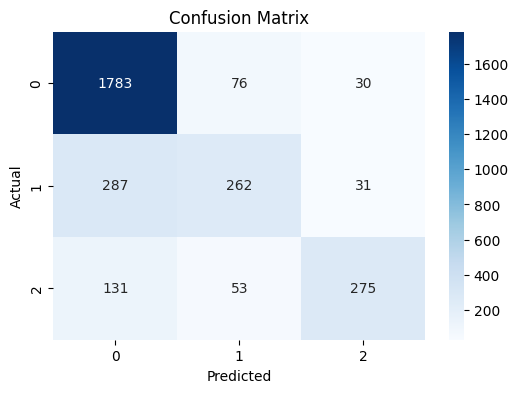

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>visualization</h2>
</div>
"""

display(HTML(interface_html))


/tmp/ipython-input-61-2393977309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['airline_sentiment'], palette='pastel')


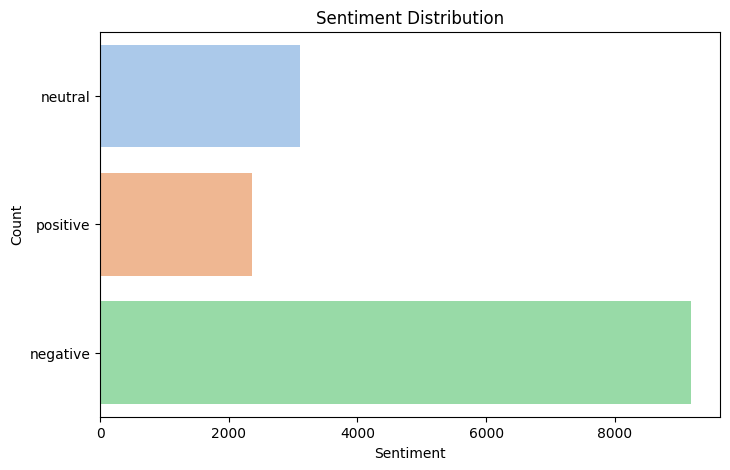

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data['airline_sentiment'], palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
from IPython.display import display, HTML
interface_html = """
<style>
    .header {
        background-color: #ff0047;
        padding: 20px;
        border: 2px solid seagreen;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
    }

    .header h2 {
        color: #000000;
        margin: 0;
    }
</style>

<div class="header">
    <h2>thankyou</h2>
</div>
"""

display(HTML(interface_html))
